### Análise de Dados Globais: População, Renda e Pesquisas Estatísticas por País

*Objetivo:* Este projeto explora dados estatísticos do Banco Mundial, analisando informações de 247 países e territórios sobre censos populacionais, grupos de renda, registros vitais e dados agrícolas, industriais e comerciais.

Os dados foram extraídos de um arquivo .CSV disponibilizado pelo World Bank com informações de 247 países e territórios.

#### 1. Importação de Bibliotecas

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


#### 2. Carregamento e Visão Geral dos Dados

In [10]:
# Carregar o dataset
df = pd.read_csv("Country.csv")

# Visualizar primeiras linhas
df.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [12]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CountryCode                                 247 non-null    object 
 1   ShortName                                   247 non-null    object 
 2   TableName                                   247 non-null    object 
 3   LongName                                    247 non-null    object 
 4   Alpha2Code                                  244 non-null    object 
 5   CurrencyUnit                                214 non-null    object 
 6   SpecialNotes                                164 non-null    object 
 7   Region                                      214 non-null    object 
 8   IncomeGroup                                 214 non-null    object 
 9   Wb2Code                                     246 non-null    object 
 10  NationalAccoun

#### 3. Seleção e Redução de Colunas

In [15]:
# Selecionando apenas as colunas relevantes para a análise:

# Colunas selecionadas
selected_columns = [
    'ShortName', 'Region', 'IncomeGroup',
    'LatestPopulationCensus', 'LatestHouseholdSurvey',
    'VitalRegistrationComplete', 'LatestAgriculturalCensus',
    'LatestIndustrialData', 'LatestTradeData', 'LatestWaterWithdrawalData'
]

# Novo DataFrame reduzido
df_reduced = df[selected_columns].copy()
df_reduced.head()

,ShortName,Region,IncomeGroup,LatestPopulationCensus,LatestHouseholdSurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Afghanistan,South Asia,Low income,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11",NaN,2013/14,NaN,2013.0,2000.0
1,Albania,Europe & Central Asia,Upper middle income,2011,"Demographic and Health Survey (DHS), 2008/09",Yes,2012,2011.0,2013.0,2006.0
2,Algeria,Middle East & North Africa,Upper middle income,2008,"Multiple Indicator Cluster Survey (MICS), 2012",NaN,NaN,2010.0,2013.0,2001.0
3,American Samoa,East Asia & Pacific,Upper middle income,2010,NaN,Yes,2007,NaN,NaN,NaN
4,Andorra,Europe & Central Asia,High income: nonOECD,2011. Population data compiled from administra...,NaN,Yes,NaN,NaN,2006.0,NaN


#### 4. Limpeza e Transformação de Dados

In [18]:
# Extraindo apenas o ano (4 dígitos) das colunas de datas:

# Função para extrair ano
def extract_year(column):
    return column.astype(str).str.extract(r"(\d{4})")

# Aplicando função
df_reduced["CensusYear"] = extract_year(df_reduced["LatestPopulationCensus"])
df_reduced["HouseholdSurveyYear"] = extract_year(df_reduced["LatestHouseholdSurvey"])
df_reduced["AgriculturalCensusYear"] = extract_year(df_reduced["LatestAgriculturalCensus"])
df_reduced["IndustrialDataYear"] = extract_year(df_reduced["LatestIndustrialData"])
df_reduced["TradeDataYear"] = extract_year(df_reduced["LatestTradeData"])
df_reduced["WaterDataYear"] = extract_year(df_reduced["LatestWaterWithdrawalData"])

# Visualizar dados tratados
df_reduced[[
    "ShortName", "Region", "IncomeGroup", "CensusYear", "HouseholdSurveyYear",
    "AgriculturalCensusYear", "IndustrialDataYear", "TradeDataYear", "WaterDataYear"
]].head(10)

,ShortName,Region,IncomeGroup,CensusYear,HouseholdSurveyYear,AgriculturalCensusYear,IndustrialDataYear,TradeDataYear,WaterDataYear
0,Afghanistan,South Asia,Low income,1979,2010,2013,NaN,2013,2000
1,Albania,Europe & Central Asia,Upper middle income,2011,2008,2012,2011,2013,2006
2,Algeria,Middle East & North Africa,Upper middle income,2008,2012,NaN,2010,2013,2001
3,American Samoa,East Asia & Pacific,Upper middle income,2010,NaN,2007,NaN,NaN,NaN
4,Andorra,Europe & Central Asia,High income: nonOECD,2011,NaN,NaN,NaN,2006,NaN
5,Angola,Sub-Saharan Africa,Upper middle income,2014,2011,2015,NaN,NaN,2005
6,Antigua and Barbuda,Latin America & Caribbean,High income: nonOECD,2011,NaN,2007,NaN,2013,2005
7,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Argentina,Latin America & Caribbean,High income: nonOECD,2010,2011,2013,2002,2013,2011
9,Armenia,Europe & Central Asia,Lower middle income,2011,2010,2013,2008,2013,2012


#### 5. Análise e Visualizações

##### 5.1. Distribuição dos Países por Grupo de Renda

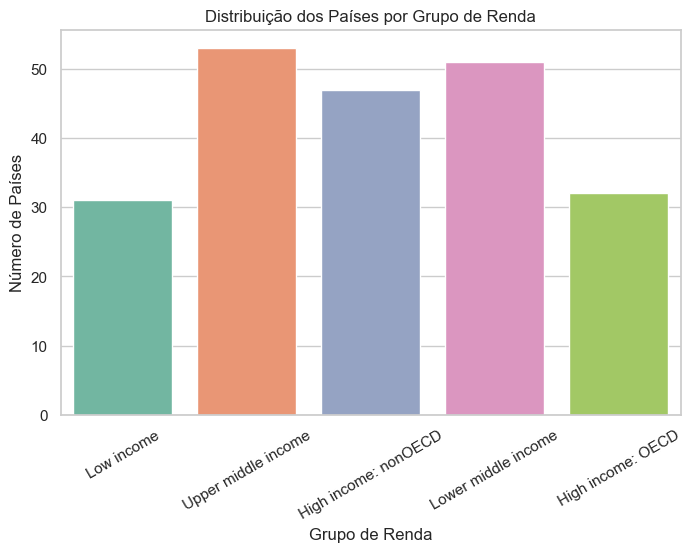

In [38]:
sns.countplot(
    data=df_reduced,
    x="IncomeGroup",
    hue="IncomeGroup",
    dodge=False,
    palette="Set2"
)

plt.legend().remove()  # remove a legenda
plt.title("Distribuição dos Países por Grupo de Renda")
plt.xlabel("Grupo de Renda")
plt.ylabel("Número de Países")
plt.xticks(rotation=30)
plt.show()


##### 5.2. Distribuição dos Anos do Último Censo Populacional

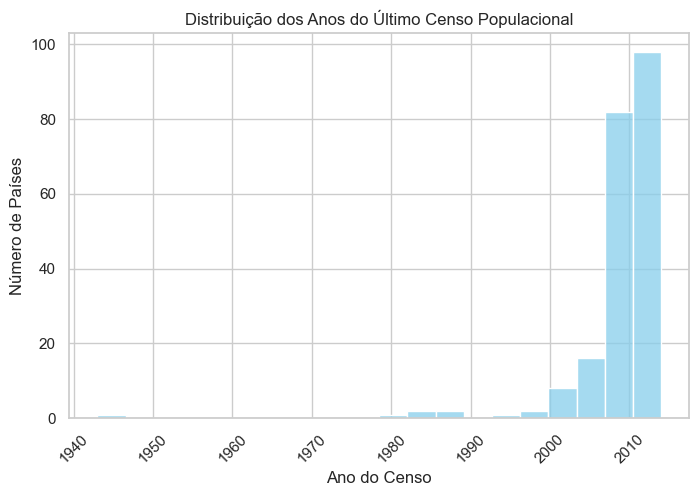

In [41]:
# Converter para numérico
df_reduced["CensusYear"] = pd.to_numeric(df_reduced["CensusYear"], errors='coerce')

# Remover valores ausentes
df_census = df_reduced.dropna(subset=["CensusYear"])

# Plot
sns.histplot(data=df_census, x="CensusYear", bins=20, color='skyblue')
plt.title("Distribuição dos Anos do Último Censo Populacional")
plt.xlabel("Ano do Censo")
plt.ylabel("Número de Países")
plt.xticks(rotation=45)
plt.show()


##### 5.3. Registro Civil Completo por Grupo de Renda

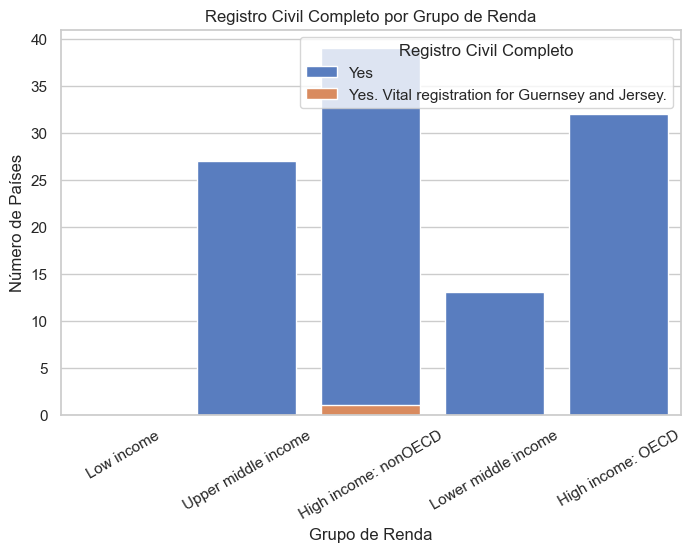

In [48]:
sns.countplot(data=df_reduced, x="IncomeGroup", hue="VitalRegistrationComplete", palette="muted")
plt.title("Registro Civil Completo por Grupo de Renda")
plt.xlabel("Grupo de Renda")
plt.ylabel("Número de Países")
plt.legend(title="Registro Civil Completo")
plt.xticks(rotation=30)
plt.show()


#### 6. Conclusão final

- **Registro civil completo por grupo de renda:** A análise mostrou que países de baixa renda tendem a ter um número maior de países sem registros civis completos, o que pode indicar uma relação entre o nível econômico e a qualidade dos registros vitais.

- **Distribuição do ano do último censo:** Observou-se uma maior concentração de censos populacionais realizados nas últimas duas décadas, refletindo uma crescente ênfase na coleta de dados populacionais.

- **Visão global dos dados do Banco Mundial:** Os dados fornecidos pelo Banco Mundial oferecem uma visão ampla sobre o estágio de desenvolvimento estatístico entre os países. Este projeto analisou informações sobre censos populacionais, grupos de renda, registros vitais e outros dados socioeconômicos, mas há muitas outras áreas a explorar.